# Examples of Unitaries Evolutions

In [2]:
%reload_ext autoreload

import numpy as np 
import matplotlib.pyplot as plt
import math as math 
import cmath as cmath
from scipy import linalg as linalg
from scipy import integrate as integ
from scipy.integrate import solve_ivp



import sys
import os
sys.path.append(os.path.abspath('../src'))

from Objects import Quantum_State, Hamiltonian, Symplectic
from QIT_Functions import Extract_Qubit_Labels_Array


## Gaussian Unitary Dynamics: 
## Coherent State in a Quantum Harmonic Oscillator 

### Semi-Analytical

This is a time independent gaussian Hamiltonian
Initializing a Gaussian State
Hello


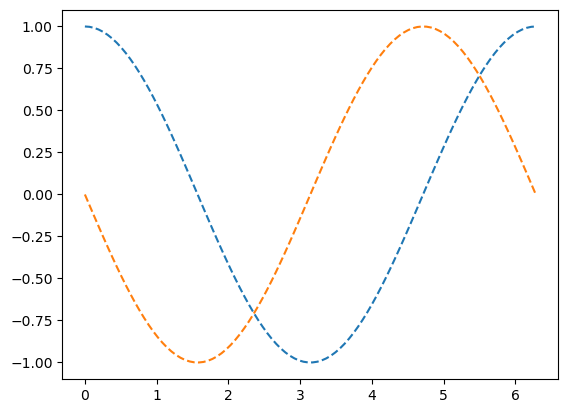

In [3]:
N_qubits = 1
n_modes = 1

########################## Hamiltonians ##########################

H_1_general = Hamiltonian(N_qubits, n_modes)
H_1_force = Hamiltonian(N_qubits, n_modes)
H_1_gauss = Hamiltonian(N_qubits, n_modes)

H_null = np.zeros((2*n_modes,2*n_modes)) 
iden = np.eye(2*n_modes)
r_null = np.zeros((2*n_modes,1)) 

H_m = np.eye(2)
r_m = r_null
H_q = H_null
r_q = r_null

H_q_0_array = np.array([0 +0*1j])

H_1_gauss.Initialize_Constant_Hamiltonians([H_m], [r_m], H_q_0_array)

########################## Initialize State ##########################

r_0 = np.array([[1.0],
                [0.0]])
sigma_0 = iden
rho_q_0 = np.ones((2*N_qubits,2*N_qubits))/(2**(2*N_qubits))

Gaussian_State = Quantum_State(N_qubits, n_modes)
Gaussian_State.Initialize_Gaussian_State(r_0, sigma_0, rho_q_0)

########################## Dynamics ##########################

t_array = np.linspace(0,2*np.pi, 100)
Gaussian_State.Unitary_Dynamics_Numerical(H_1_gauss, t_array)

plt.plot(t_array,Gaussian_State.r_t[:,0], '--')
plt.plot(t_array,Gaussian_State.r_t[:,1], '--');

print('Hello')

### Analytical

This is a time independent gaussian Hamiltonian
Initializing a Gaussian State


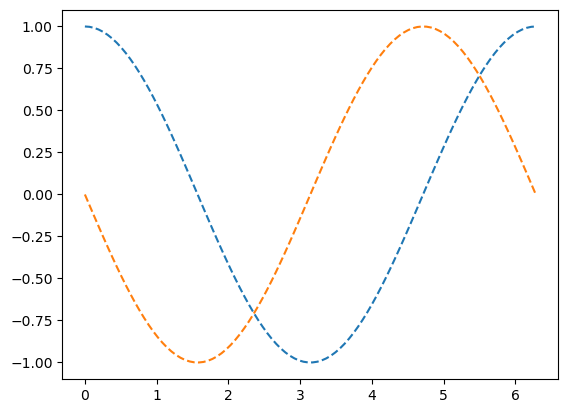

In [3]:
N_qubits = 1
n_modes = 1

omega = 1

########################## Hamiltonians ##########################

H_1_gauss = Hamiltonian(N_qubits, n_modes)
H_1_force = Hamiltonian(N_qubits, n_modes)

H_null = np.zeros((2*n_modes,2*n_modes)) 
iden = np.eye(2*n_modes)
r_null = np.zeros((2*n_modes,1)) 

H_m = omega*np.eye(2)
r_m = r_null
H_q = H_null
r_q = np.array([[0.0],[0.0]])

H_q_0_array = np.array([0 +0*1j])

H_1_gauss.Initialize_Constant_Hamiltonians([H_m], [r_m], H_q_0_array)

########################## Initialize State ##########################

r_0 = np.array([[1.0],
                [0.0]])
sigma_0 = iden
rho_q_0 = np.ones((2*N_qubits,2*N_qubits))/(2**(2*N_qubits))

Gaussian_State = Quantum_State(N_qubits, n_modes)
Gaussian_State.Initialize_Gaussian_State(r_0, sigma_0, rho_q_0)

########################## Initialize Sympeltic Methods ##########################

Symp_QHO_1 = Symplectic(N_qubits, n_modes)

symplectic_name = "QHO_1"
symplectic_parameters = omega

Symp_QHO_1.Initialize_Constant_Symplectic(symplectic_name, symplectic_parameters)

t_array = np.linspace(0,2*np.pi, 100)

Gaussian_State.Unitary_Dynamics_Analytical(H_1_gauss, Symp_QHO_1, t_array)

########################## Plot First Moments ##########################


plt.plot(t_array,Gaussian_State.r_t[:,0], '--')
plt.plot(t_array,Gaussian_State.r_t[:,1], '--')


## Linear Qubit-Mode Interaction: 
## Stern-Gerlach Interfereometry

### Semi-Analytical

In [4]:
N_qubits = 1
n_modes = 1

########################## Hamiltonians ##########################

H_1_general = Hamiltonian(N_qubits, n_modes)
H_1_force = Hamiltonian(N_qubits, n_modes)

H_null = np.zeros((2*n_modes,2*n_modes)) 
iden = np.eye(2*n_modes)
r_null = np.zeros((2*n_modes,1)) 

H_m = np.eye(2)
r_m =  r_null #np.array([[0.5],[0.0]])
H_q = H_null
r_q = 2*np.array([[1.0],[0.0]])

H_q_0_array = np.array([0 +0*1j])

H_1_force.Initialize_Constant_Hamiltonians([H_m], [r_m, r_q], H_q_0_array)

########################## Initialize State ##########################

r_0 = np.array([[0.0],
                [0.0]])
sigma_0 = iden
rho_q_0 = np.ones((2*N_qubits,2*N_qubits))/(2**(2*N_qubits))

GCS = Quantum_State(N_qubits, n_modes)
GCS.Initialize_Gaussian_State(r_0, sigma_0, rho_q_0)

########################## Dynamics ##########################

t_array = np.linspace(0,2*np.pi, 100)

GCS.Unitary_Dynamics_Numerical(H_1_force, t_array)



This is a time independent operator-valued force Hamiltonian
Initializing a Gaussian State


/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


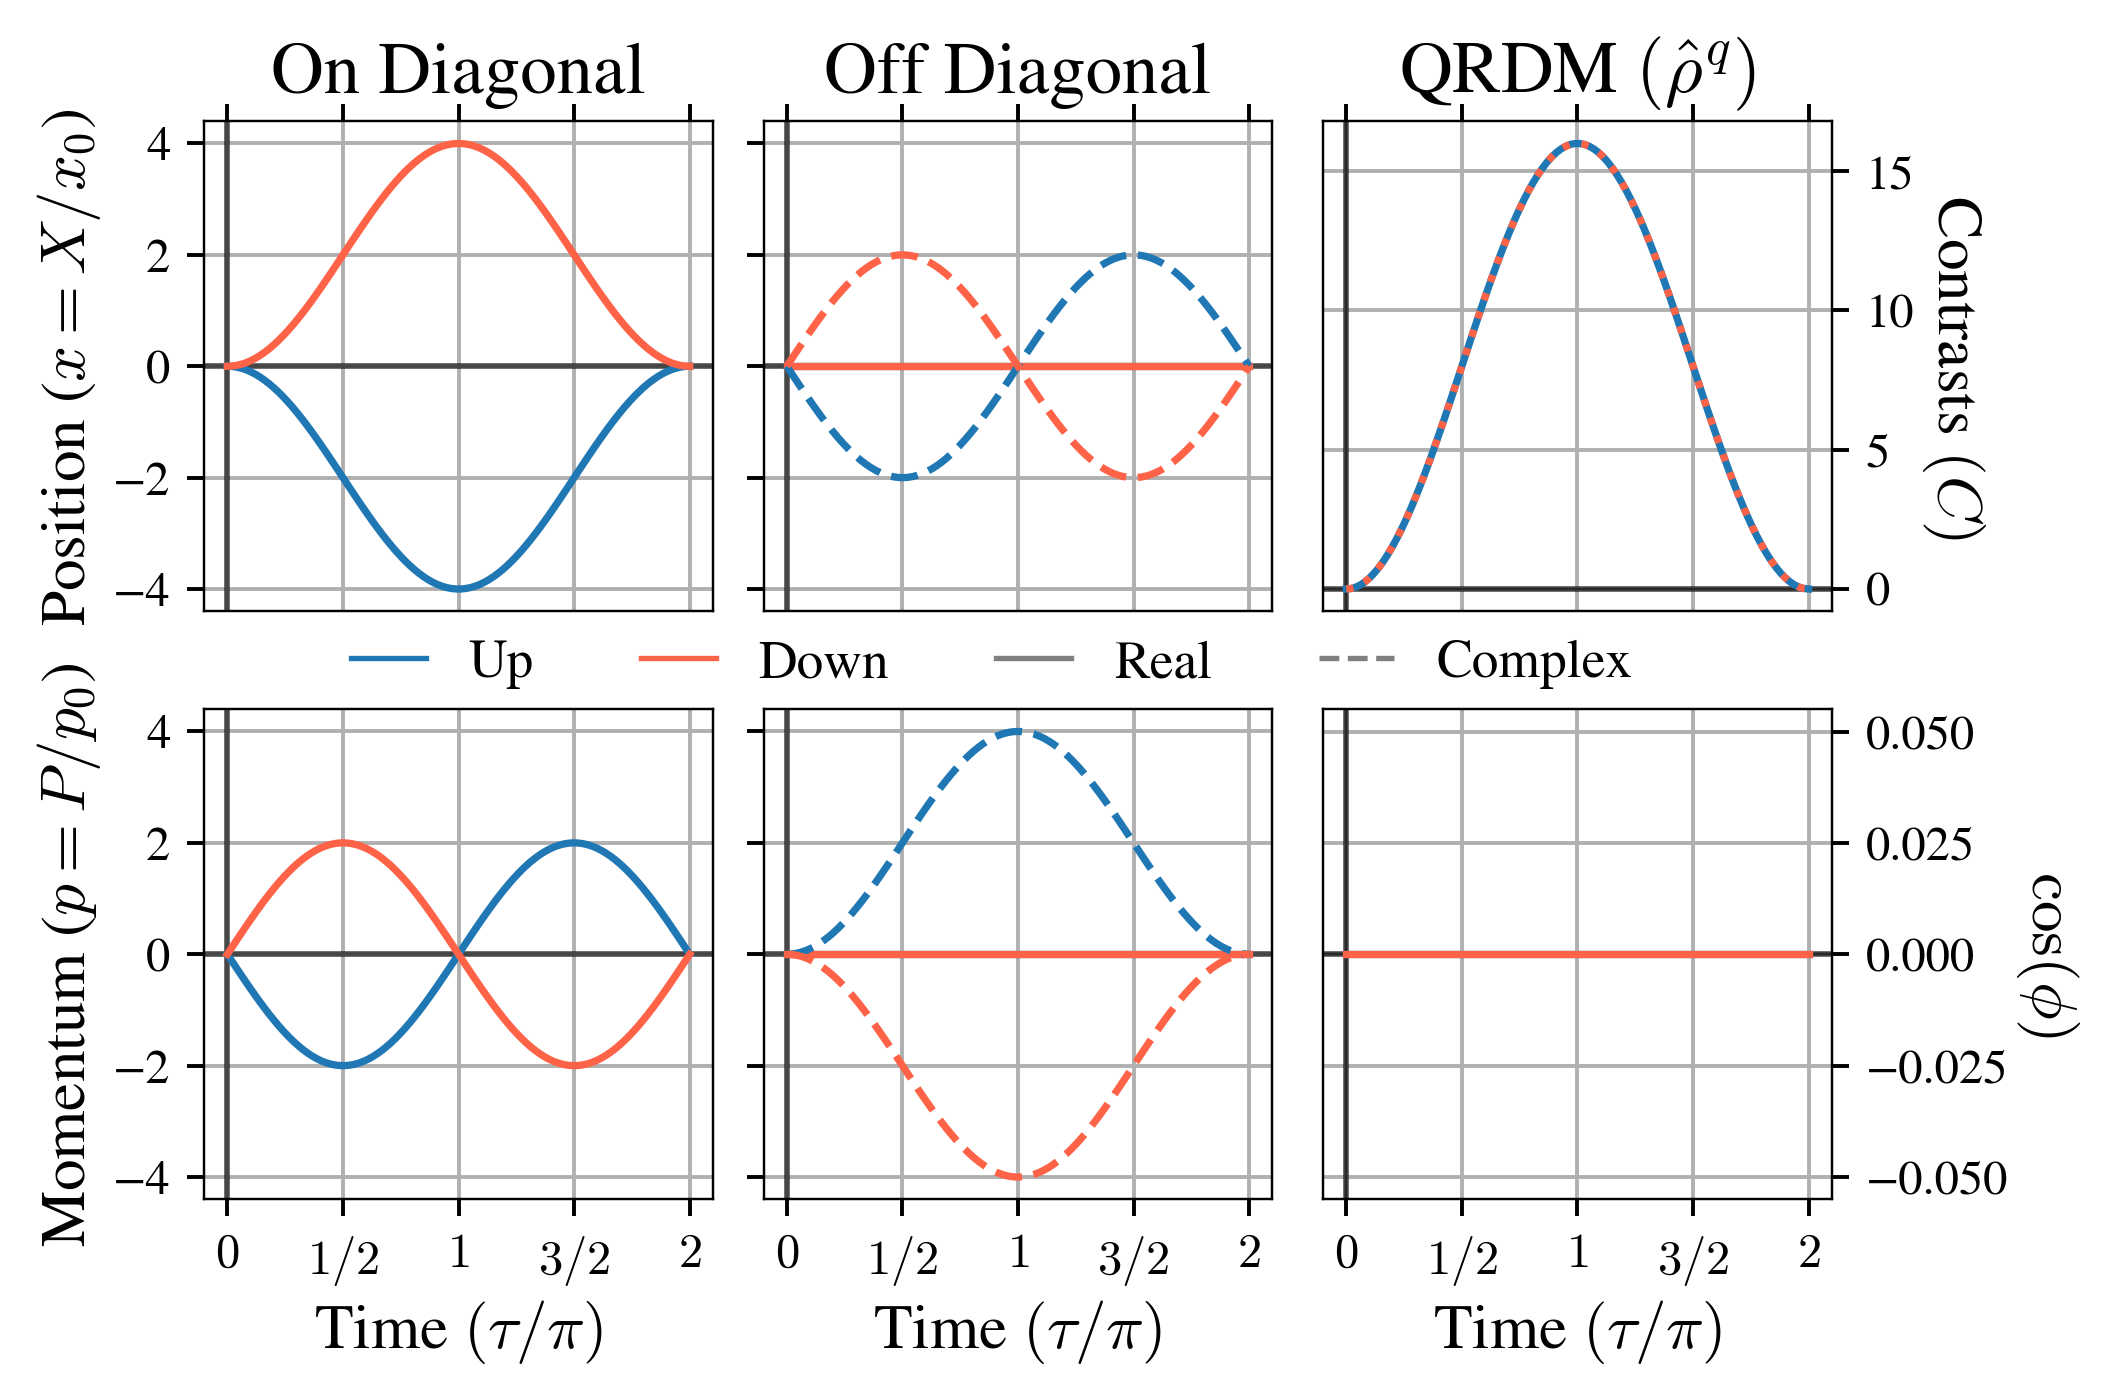

In [5]:
Parameter_list = []
array_pi = np.linspace(0,2,5)

GCS.Plot_Phase_Space_First_QRDM(Parameter_list, array_pi, False);

### Analytical (with Unknown Force)

This is a time independent operator-valued force Hamiltonian
Initializing a Gaussian State


/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


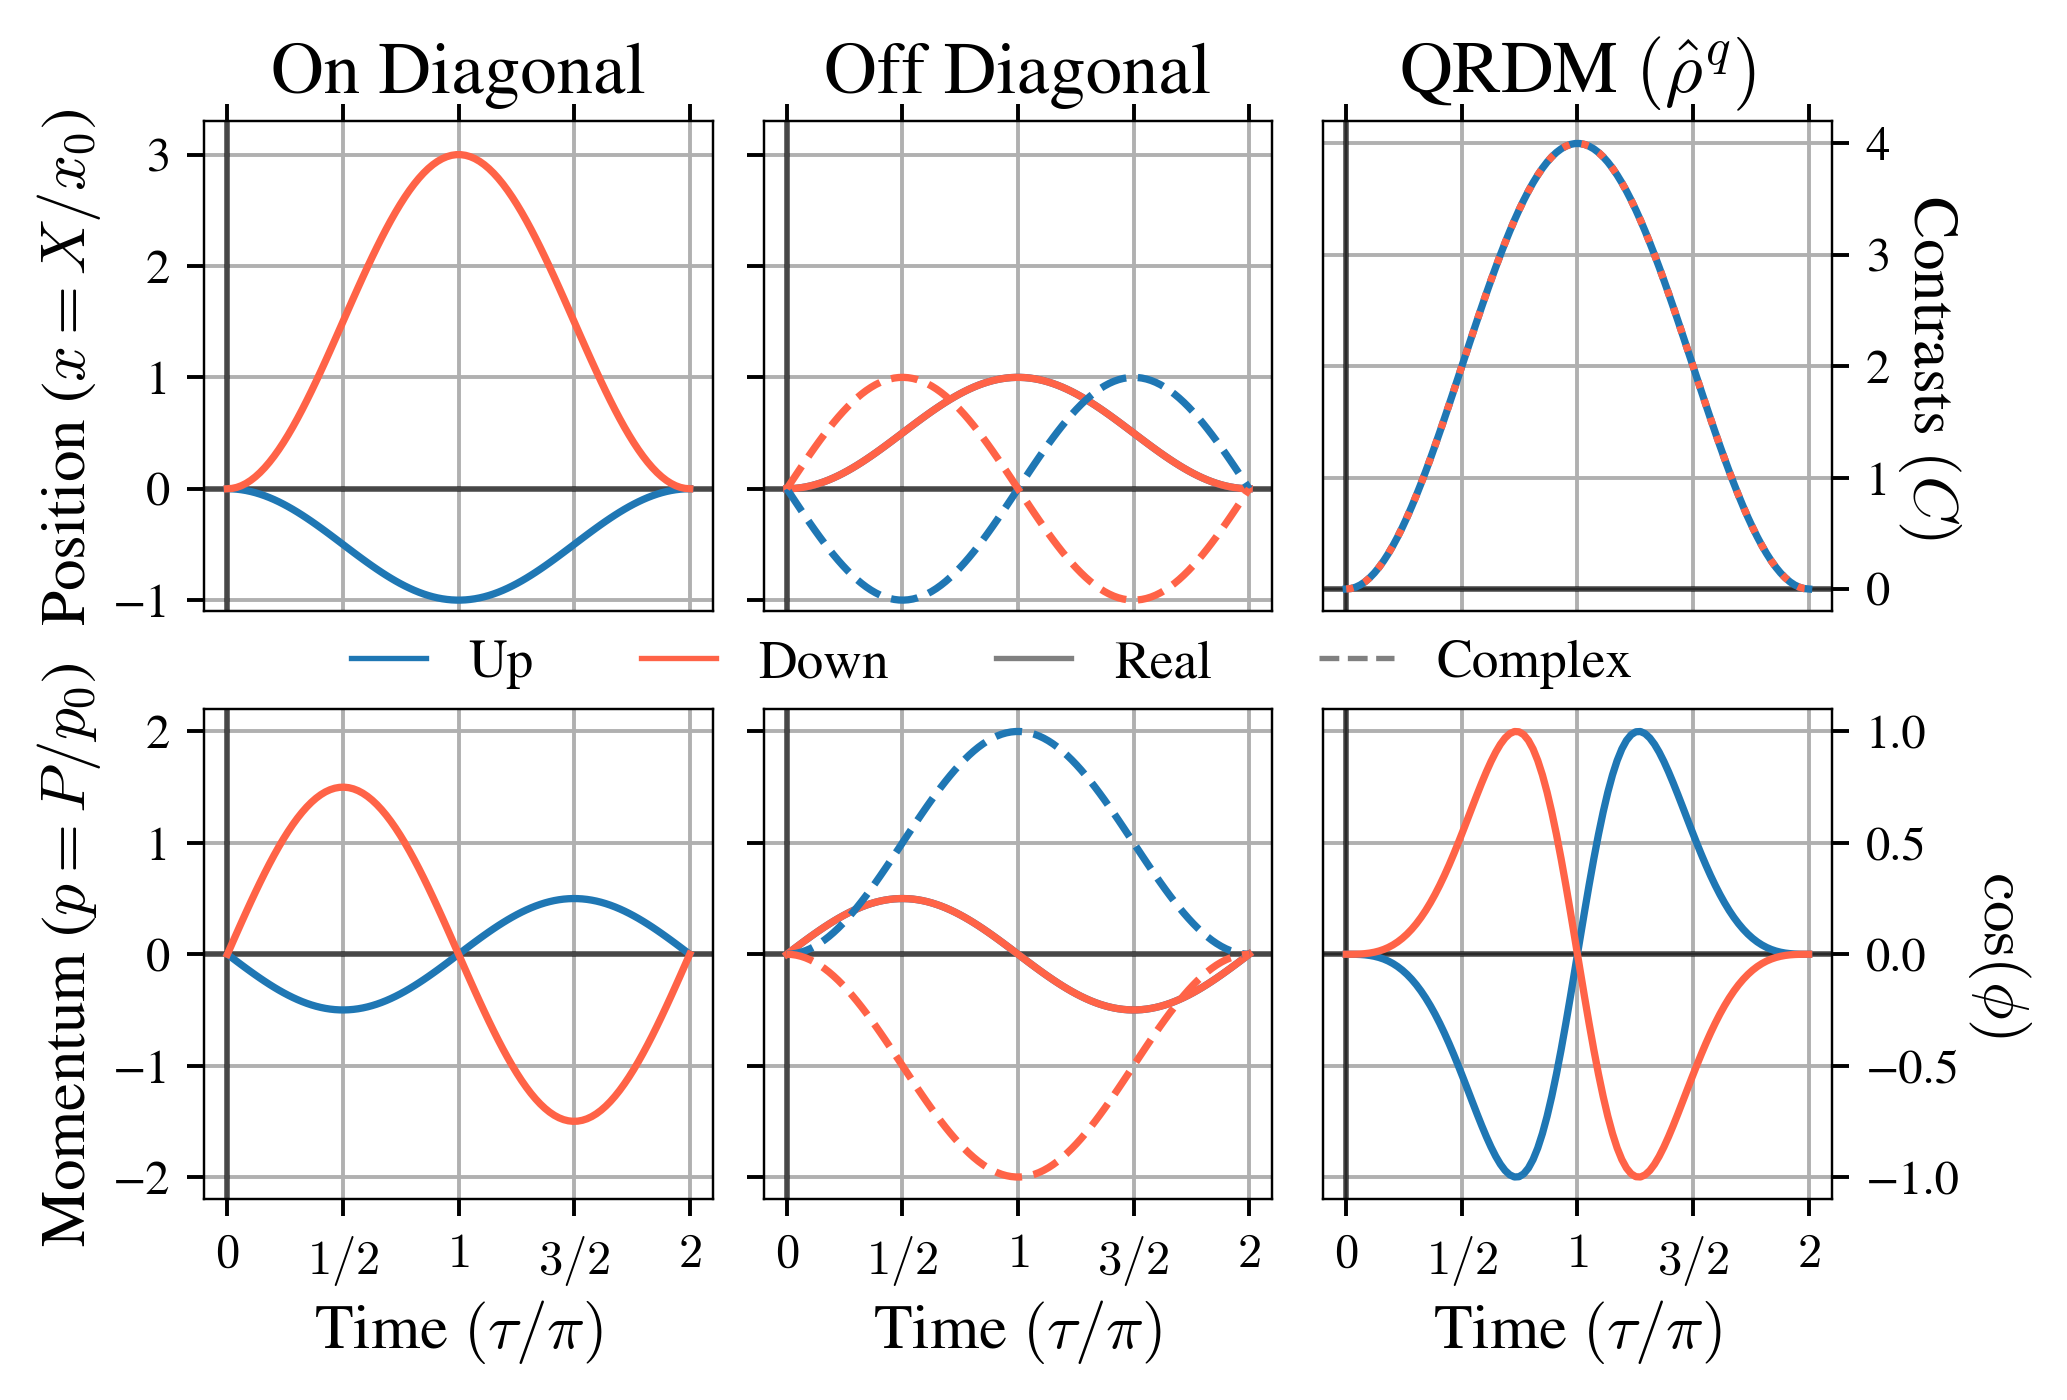

In [6]:
N_qubits = 1
n_modes = 1

omega = 1

########################## Hamiltonians ##########################

H_1_force = Hamiltonian(N_qubits, n_modes)

H_null = np.zeros((2*n_modes,2*n_modes)) 
iden = np.eye(2*n_modes)
r_null = np.zeros((2*n_modes,1)) 

H_m = omega*np.eye(2)
r_m =  np.array([[0.5],[0.0]])
H_q = H_null
r_q = np.array([[1.0],[0.0]])

H_q_0_array = np.array([0 +0*1j])
H_1_force.Initialize_Constant_Hamiltonians([H_m], [r_m, r_q], H_q_0_array)

########################## Initialize State ##########################

r_0 = np.array([[0.0],
                [0.0]])
sigma_0 = iden
rho_q_0 = np.ones((2*N_qubits,2*N_qubits))/(2**(2*N_qubits))


GCS = Quantum_State(N_qubits, n_modes)
GCS.Initialize_Gaussian_State(r_0, sigma_0, rho_q_0)

########################## Initialize Sympeltic Methods ##########################

Symp_QHO_1 = Symplectic(N_qubits, n_modes)

symplectic_name = "QHO_1"
symplectic_parameters = omega

Symp_QHO_1.Initialize_Constant_Symplectic(symplectic_name, symplectic_parameters)

t_array = np.linspace(0,2*np.pi, 100)


GCS.Unitary_Dynamics_Analytical(H_1_force, Symp_QHO_1, t_array)

########################## Plot First Moments ##########################

Parameter_list = []
array_pi = np.linspace(0,2,5)

GCS.Plot_Phase_Space_First_QRDM(Parameter_list, array_pi, False)

## Quadratic Mode-Qubits Interaction: 
## An Atom and a Cavity Interacting via Dissipative Coupling

### Numerical

This is a time independent operator-valued general Hamiltonian
Initializing a Gaussian State


/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


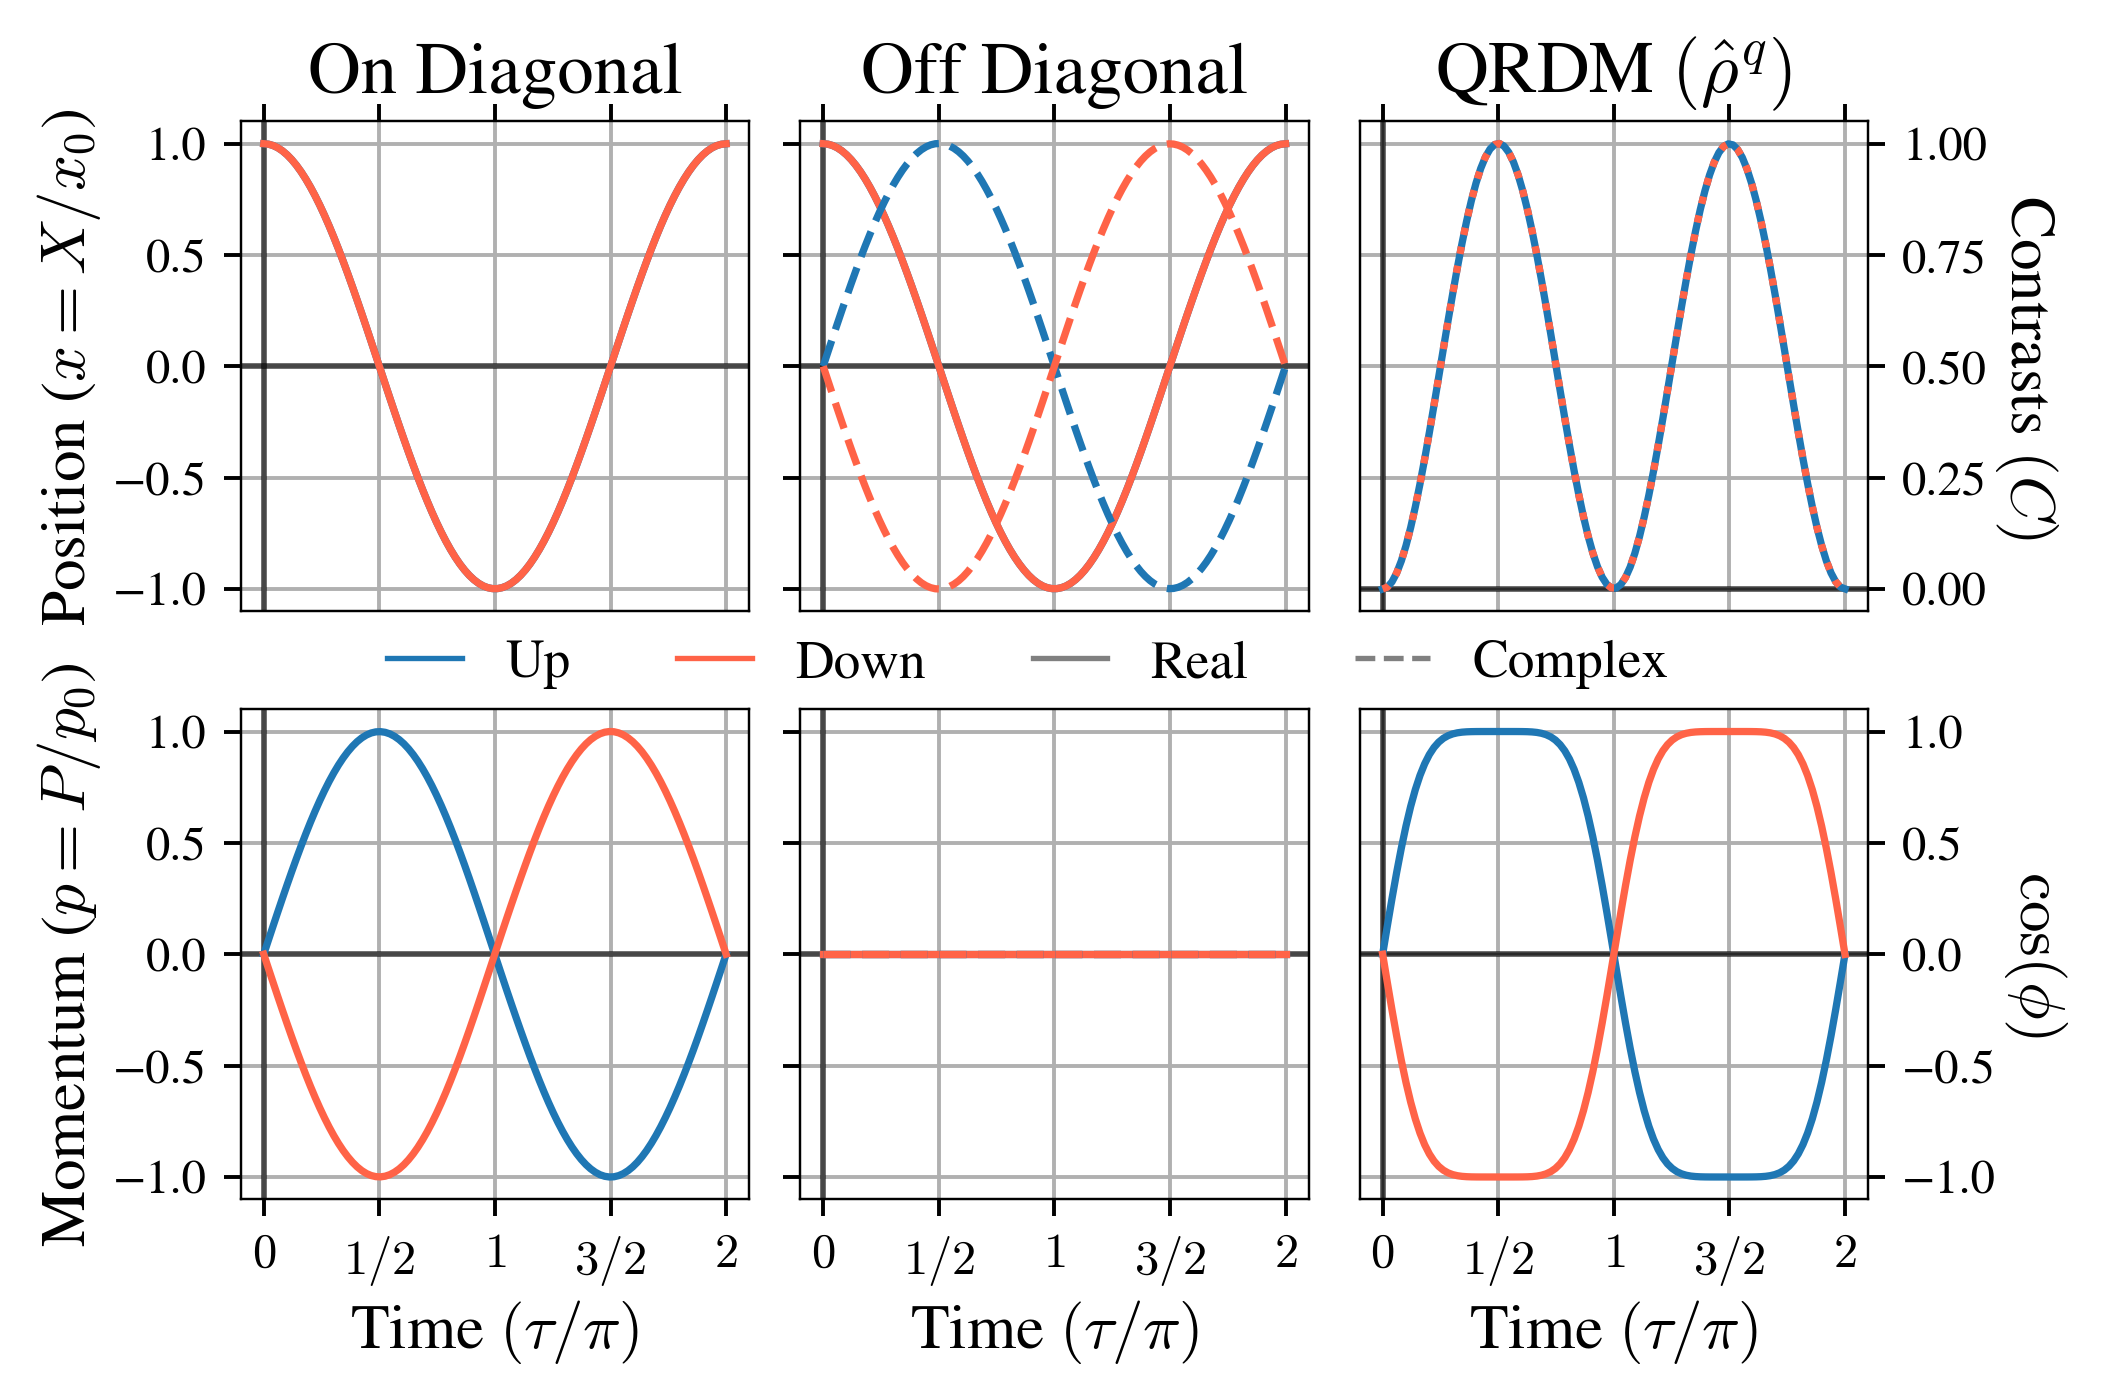

In [7]:
N_qubits = 1
n_modes = 1

########################## Hamiltonians ##########################

H_1_general = Hamiltonian(N_qubits, n_modes)

H_null = np.zeros((2*n_modes,2*n_modes)) 
iden = np.eye(2*n_modes)
r_null = np.zeros((2*n_modes,1)) 

H_m = H_null
r_m = r_null
H_q = np.eye(2)
r_q = r_null

H_q_0_array = np.array([0 +0*1j])

H_1_general.Initialize_Constant_Hamiltonians([H_m, H_q], [r_m, r_q], H_q_0_array)

########################## Initialize State ##########################

r_0 = np.array([[1.0],
                [0.0]])
sigma_0 = iden
rho_q_0 = np.ones((2*N_qubits,2*N_qubits))/(2**(2*N_qubits))

gaussian_state_general = Quantum_State(N_qubits, n_modes)
gaussian_state_general.Initialize_Gaussian_State(r_0, sigma_0, rho_q_0)


########################## Dynamics ##########################

t_array = np.linspace(0,2*np.pi, 100)

gaussian_state_general.Unitary_Dynamics_Numerical(H_1_general, t_array)


########################## Plot First Moments ##########################


gaussian_state_general.Plot_Phase_Space_First_QRDM(Parameter_list, array_pi, False);

## Time Dependent Mode-Qubits Interaction: 
## A Stern-Gerlach Intereferometer with Gaussian Unstable Dynamcis (Inverted Harmonic Oscillator) for Expansion of the Superposition 

### Numerical

This is a time dependent operator-valued general Hamiltonian
Initializing a Gaussian State


/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


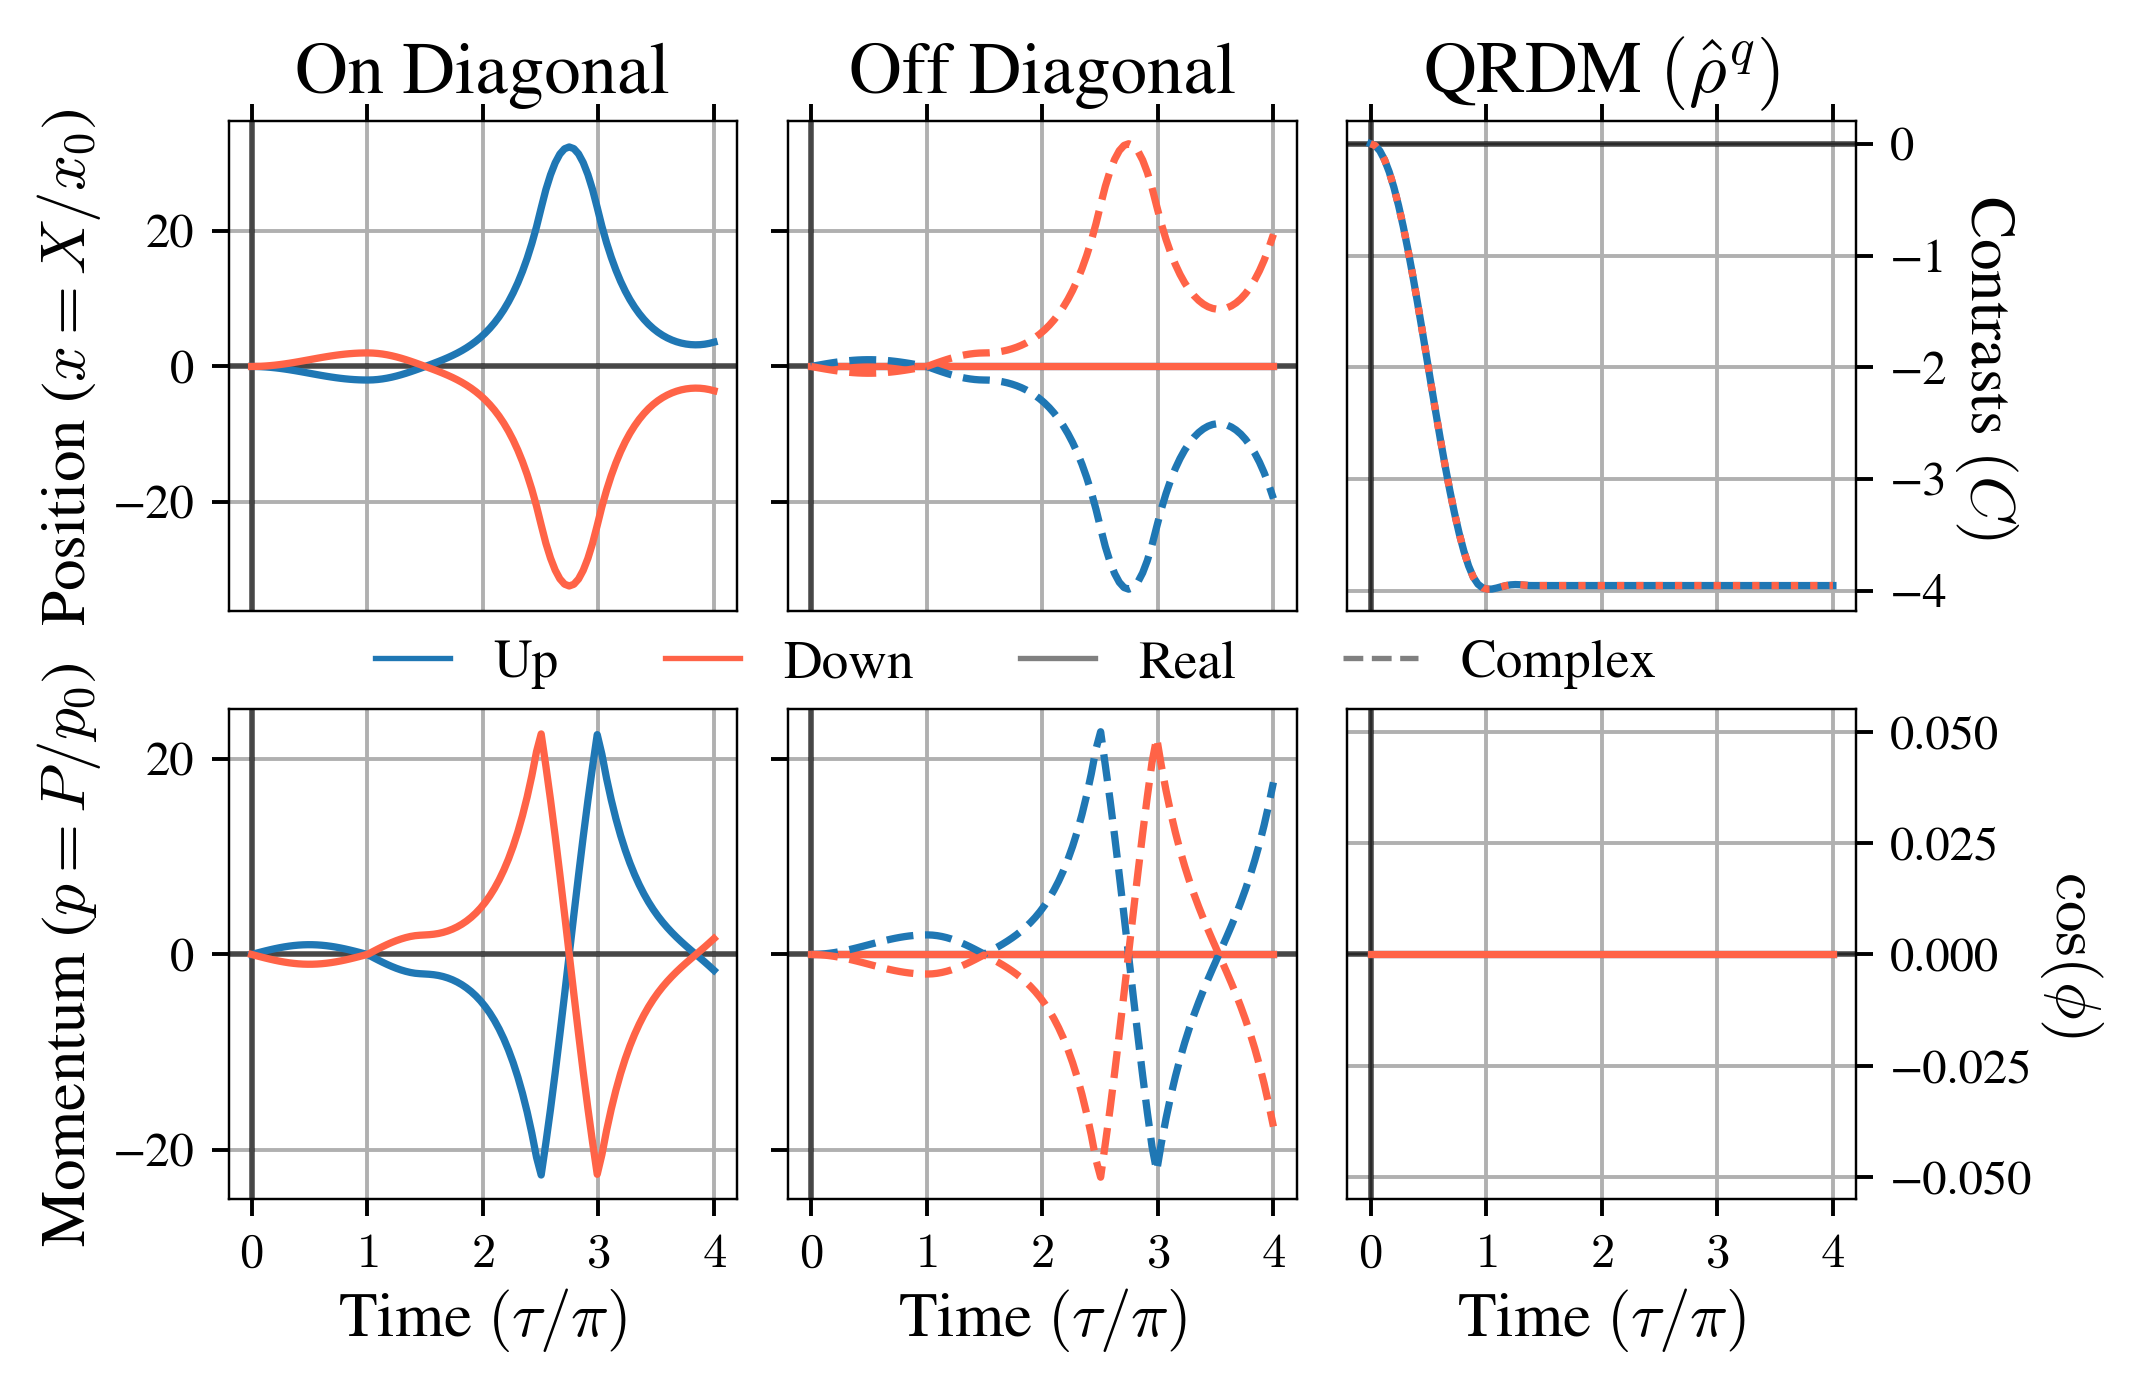

In [10]:
N_qubits = 1
n_modes = 1

########################## Hamiltonians ##########################

H_time_dep = Hamiltonian(N_qubits, n_modes)

t_plus = np.pi/2
t_minus =0.5* np.pi
t_split = np.pi

t_array = np.linspace(0, 2*(t_split + t_plus + t_minus),100)

def H_m_t(t):

    iden = np.eye(2*n_modes)

    t_plus = np.pi/2
    t_minus = np.pi
    t_split = np.pi

    H_QHO = iden
    H_IHO = np.array([[-1.0,0.0],[0.0,1.0]])

    if t < t_split:
        H_mat = H_QHO
    elif t >= t_split and t < t_split + t_plus:
        H_mat = H_QHO
    elif t >= t_split + t_plus and t < t_split + t_plus + t_minus:
        H_mat = H_IHO
    elif t >= t_split + t_plus + t_minus and t < t_split + 2*t_plus + t_minus:
        H_mat = H_QHO
    elif t >= t_split + 2*t_plus + t_minus and t < t_split + 2*t_plus + 2*t_minus:
        H_mat = H_IHO
    else:
        H_mat = np.zeros((2,2))
    
    return H_mat

def r_q_t(t):

    iden = np.eye(2*n_modes)
    r_null = np.zeros((2*n_modes,1)) 

    t_plus = np.pi/2
    t_minus = np.pi
    t_split = np.pi

    f_q = 1

    if t < t_split:
        r_mat = f_q* np.array([[1],[0]])
    elif t > t_split + 2*t_plus + 2*t_minus:
        r_mat = -f_q* np.array([[1],[0]])
    else: 
        r_mat = r_null
    return r_mat


def H_q_t(t):
    return  np.zeros((2*n_modes,2*n_modes))  

def r_m_t(t):
    return np.zeros((2*n_modes,1)) 

def H_q_0_t(t):
    return 0


H_array_func = [H_m_t, H_q_t]
r_array_func = [r_m_t, r_q_t]
H_q_0_array_func = [H_q_0_t]

H_time_dep.Initialize_Time_Dep_Hamiltonian(H_array_func, r_array_func, H_q_0_array_func, t_array)

########################## Initialize State ##########################

r_0 = np.array([[0.0],
                [0.0]])
sigma_0 = iden
rho_q_0 = np.ones((2*N_qubits,2*N_qubits))/(2**(2*N_qubits))

GCS = Quantum_State(N_qubits, n_modes)
GCS.Initialize_Gaussian_State(r_0, sigma_0, rho_q_0)

########################## Dynamics ##########################

GCS.Unitary_Dynamics_Numerical(H_time_dep , t_array)


########################## Plot First Moments ##########################

array_pi = np.arange(0,4.1,1)
GCS.Plot_Phase_Space_First_QRDM(Parameter_list, array_pi, False);

Text(0.5, 1.0, 'down-up')

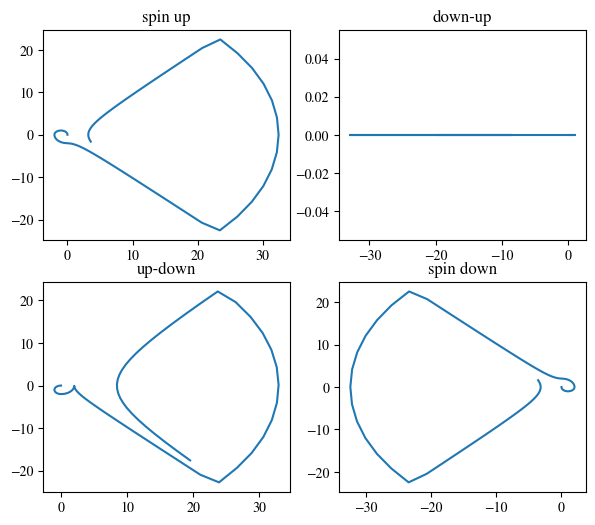

In [9]:
########################## Plot First Moments ##########################

fig, ax = plt.subplots(2, 2, figsize=(7,6))

ax[0,0].plot(GCS.r_JK_t[:,0,0,0],GCS.r_JK_t[:,0,0,1])
ax[0,0].set_title('spin up')

ax[1,0].plot(np.imag(GCS.r_JK_t[:,1,0,0]), np.imag(GCS.r_JK_t[:,1,0,1]))
ax[1,0].set_title('up-down')

ax[1,1].plot(GCS.r_JK_t[:,1,1,0],GCS.r_JK_t[:,1,1,1])
ax[1,1].set_title('spin down')

ax[0,1].plot(np.imag(GCS.r_JK_t[:,0,1,0]),np.imag(GCS.r_JK_t[:,0,0,1]))
ax[0,1].set_title('down-up')